In [5]:
""" 
13 MARCH 2024 
Theo Gauvrit
Testing if the tuning of the neurons for amplitude is different between genotype
"""

import numpy as np
import pandas as pd
import percephone.core.recording as pc
import os
import percephone.plts.behavior as pbh
import matplotlib
import matplotlib.pyplot as plt
import percephone.plts.heatmap as hm
from multiprocessing import Pool, cpu_count
from sklearn.metrics.pairwise import cosine_similarity
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
plt.switch_backend("Qt5Agg")
matplotlib.use("Qt5Agg")
%matplotlib inline

In [6]:
directory = "/datas/Théo/Projects/Percephone/data/Amplitude_Detection/loop_format_tau_02/"
roi_path = directory + "/FmKO_ROIs&inhibitory.xlsx"
roi_info = pd.read_excel(roi_path)
files = os.listdir(directory)
files_ = [file for file in files if file.endswith("synchro")]

In [7]:
def opening_rec(fil,i):
    rec = pc.RecordingAmplDet(directory + fil + "/", 0, roi_path)
    return rec

workers = cpu_count()
pool = Pool(processes=workers)
async_results = [pool.apply_async(opening_rec, args=(file,i)) for i,file in enumerate(files_)]
recs = [ar.get() for ar in async_results]

Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorporated in the analog.
Behavioural information already incorpora

ValueError: fp and xp are not of the same length.

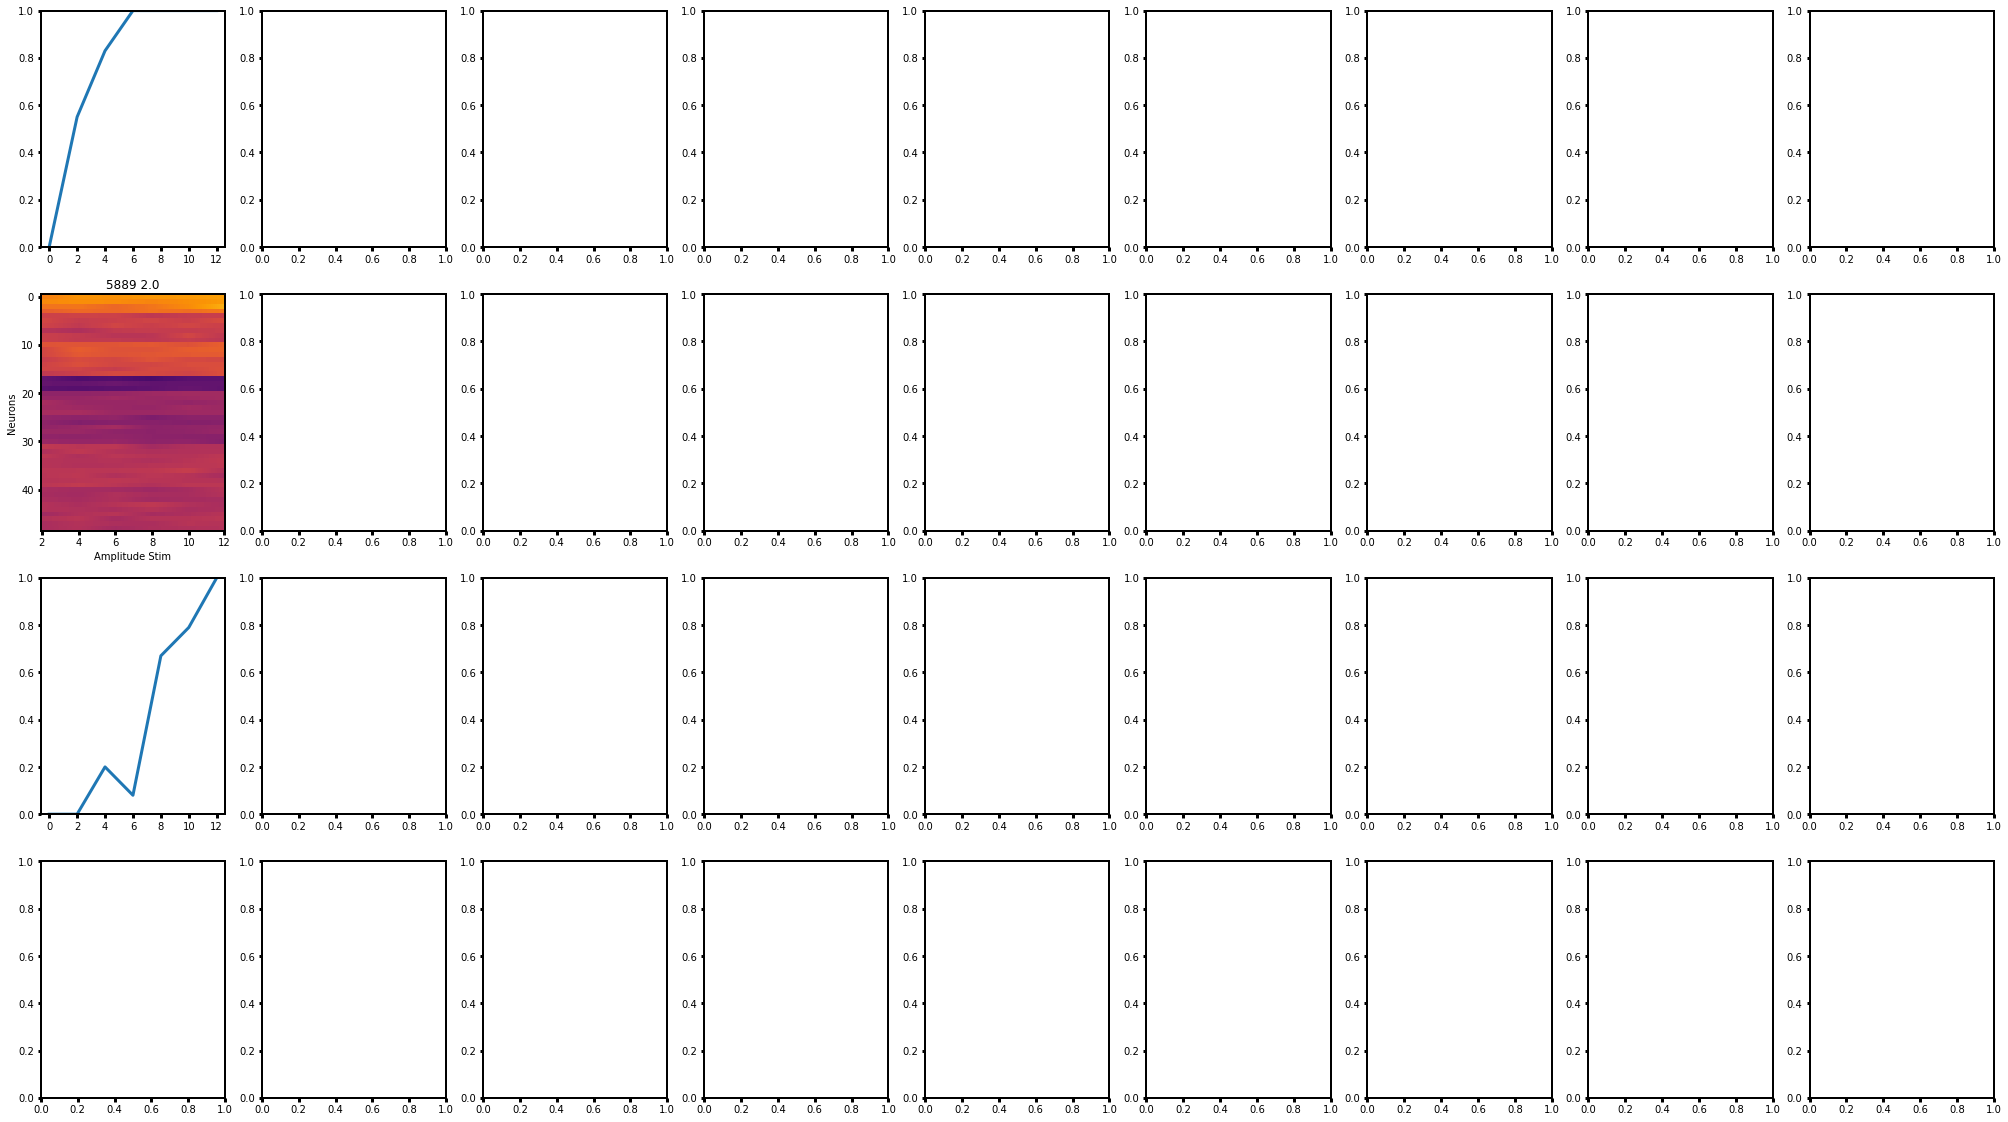

In [8]:
y, i = 0, 0
fig, ax = plt.subplots(4, 9, figsize=(35, 20))

for rec in recs:
        act = rec.zscore_exc
        if rec.genotype == "WT":
            pbh.psycho_like_plot(rec, roi_info, ax[0, i])
            hm.amp_tuning_heatmap(ax[1, i], rec, act, str(rec.filename) + " " +str(rec.threshold))
            i = i + 1
        else:
            pbh.psycho_like_plot(rec, roi_info, ax[2, y])
            hm.amp_tuning_heatmap(ax[3, y], rec,  act, str(rec.filename) + " " +str(rec.threshold))
            y = y + 1

fig.suptitle('Amplitude tuning firing', fontsize=26)